In [ ]:
import os
os.getcwd()
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

FileName = 'ADANIENT.NS.csv'
Adani=pd.read_csv(FileName)

In [ ]:
Adani.head()

,Date,Open,High,Low,Close,Volume
0,01/07/2002,1.364148,1.401700,1.334259,1.362615,1080397
1,02/07/2002,1.386372,1.390971,1.356484,1.373344,1016147
2,03/07/2002,1.371811,1.387139,1.364914,1.373344,980394
3,04/07/2002,1.379475,1.401700,1.379475,1.381008,972747
4,05/07/2002,1.388672,1.388672,1.372578,1.377942,974496


In [ ]:
Adani.tail()

,Date,Open,High,Low,Close,Volume
4751,23/08/2021,1415.050049,1427.750000,1361.550049,1396.699951,4866080
4752,24/08/2021,1407.000000,1448.400024,1390.000000,1437.800049,3362312
4753,25/08/2021,1444.250000,1481.800049,1425.000000,1475.349976,5361140
4754,26/08/2021,1482.000000,1494.650024,1460.400024,1475.699951,4678919
4755,27/08/2021,1475.000000,1515.000000,1474.099976,1506.050049,5164477


In [ ]:
df1=Adani.reset_index()['Close']

In [ ]:
df1.shape

(4756,)

In [ ]:
df1

0          1.362615
1          1.373344
2          1.373344
3          1.381008
4          1.377942
           ...     
4751    1396.699951
4752    1437.800049
4753    1475.349976
4754    1475.699951
4755    1506.050049
Name: Close, Length: 4756, dtype: float64

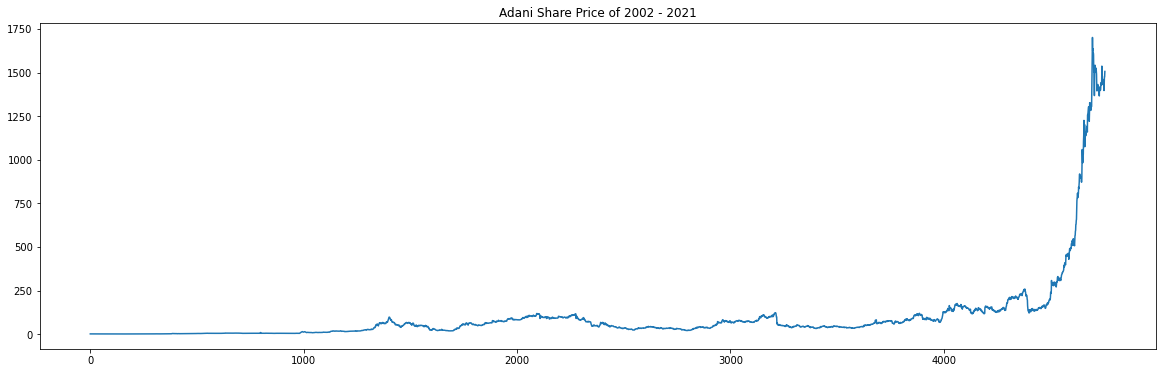

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.title('Adani Share Price of 2002 - 2021')
plt.plot(df1)

In [ ]:
Adani.Date = pd.to_datetime(Adani.Date)
Adani.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4756 entries, 0 to 4755
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4756 non-null   datetime64[ns]
 1   Open    4756 non-null   float64       
 2   High    4756 non-null   float64       
 3   Low     4756 non-null   float64       
 4   Close   4756 non-null   float64       
 5   Volume  4756 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 223.1 KB


In [ ]:
Adani = Adani.set_index('Date')

In [ ]:
pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

     / 306 kB 653 kB/s
  Created wheel for mpl-finance: filename=mpl_finance-0.10.1-py3-none-any.whl size=8435 sha256=e128a16846fff561d7e83cfe3146983329d5daefb63ea27086adc44c5f0f1845
  Stored in directory: /tmp/pip-ephem-wheel-cache-869cmcg4/wheels/eb/17/99/0f3929e635912eb25fc346aaf43b4ee3da4a80dee8ce3d2e4f
Successfully built mpl-finance


In [ ]:
pip install --upgrade mplfinance

     |████████████████████████████████| 62 kB 762 kB/s 


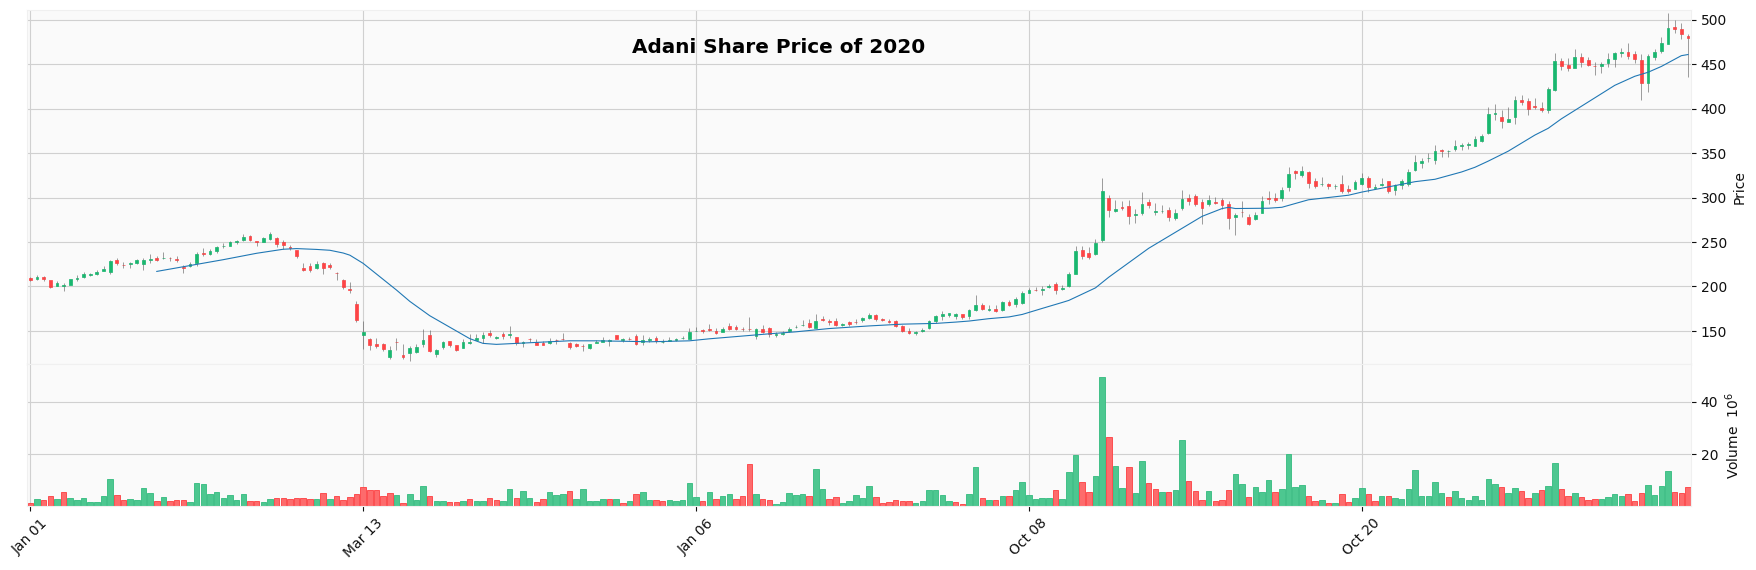

In [ ]:
import mplfinance as mpf
mpf.plot(Adani['2020'], 
         type='candle', mav=(20), 
         volume=True, 
         title = 'Adani Share Price of 2020', 
         figratio=(20,6), tight_layout = True, 
         style = 'yahoo')

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[2.60563003e-04],
       [2.66874067e-04],
       [2.66874067e-04],
       ...,
       [8.67296498e-01],
       [8.67502362e-01],
       [8.85355042e-01]])

In [ ]:
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size, test_size

(3567, 1189)

In [ ]:
len(train_data), len(test_data)

(3567, 1189)

In [ ]:
import numpy 
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range (len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
print(X_train)

[[0.00026056 0.00026687 0.00026687 ... 0.00013208 0.00015057 0.00016815]
 [0.00026687 0.00026687 0.00027138 ... 0.00015057 0.00016815 0.00016454]
 [0.00026687 0.00027138 0.00026958 ... 0.00016815 0.00016454 0.00016454]
 ...
 [0.02354645 0.02367466 0.02255282 ... 0.02234448 0.02109444 0.02103033]
 [0.02367466 0.02255282 0.02263295 ... 0.02109444 0.02103033 0.02091815]
 [0.02255282 0.02263295 0.02279322 ... 0.02103033 0.02091815 0.02090212]]


In [ ]:
print(X_train.shape), print(y_train.shape)

(3466, 100)
(3466,)


(None, None)

In [ ]:
print(X_test.shape), print(y_test.shape)

(1088, 100)
(1088,)


(None, None)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
55/55 [==============================] - 17s 212ms/step - loss: 1.0618e-04 - val_loss: 0.0042
Epoch 2/100
55/55 [==============================] - 10s 185ms/step - loss: 1.1108e-05 - val_loss: 0.0050
Epoch 3/100
55/55 [==============================] - 10s 184ms/step - loss: 1.3955e-05 - val_loss: 0.0017
Epoch 4/100
55/55 [==============================] - 10s 187ms/step - loss: 9.4050e-06 - val_loss: 0.0026
Epoch 5/100
55/55 [==============================] - 10s 186ms/step - loss: 8.9628e-06 - val_loss: 0.0025
Epoch 6/100
55/55 [==============================] - 10s 188ms/step - loss: 8.4309e-06 - val_loss: 0.0021
Epoch 7/100
55/55 [==============================] - 10s 187ms/step - loss: 8.4694e-06 - val_loss: 0.0023
Epoch 8/100
55/55 [==============================] - 10s 187ms/step - loss: 8.6819e-06 - val_loss: 0.0026
Epoch 9/100
55/55 [==============================] - 10s 188ms/step - loss: 6.9509e-06 - val_loss: 0.0022
Epoch 10/100
55/55 [==========================

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

51.52810906756969

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

453.7545871442207

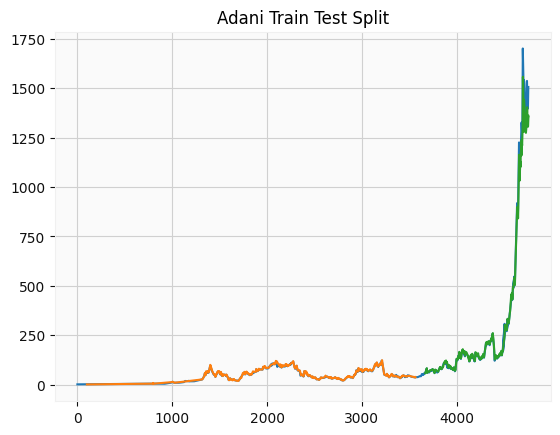

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title('Adani Train Test Split')
plt.show()

In [ ]:
len(test_data)

1189

In [ ]:
x_input=test_data[1089:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.82008016]
101
1 day input [0.72026973 0.68506449 0.68327038 0.70615234 0.63144779 0.65024154
 0.66412363 0.68121159 0.66788829 0.67165294 0.68050575 0.68038806
 0.68965261 0.70012304 0.69662305 0.69491726 0.6810351  0.73800473
 0.74209286 0.74503399 0.75635731 0.76350426 0.766563   0.76621008
 0.75579853 0.71729917 0.75773963 0.77985687 0.76103367 0.76532774
 0.77303347 0.76815125 0.75400441 0.77756285 0.77932752 0.76568066
 0.77373938 0.83253243 0.90929576 0.93067772 1.         0.95491263
 0.9620595  0.93747175 0.94767743 0.94155988 0.88264915 0.90464877
 0.85138506 0.80397408 0.87444344 0.90532525 0.90626639 0.88459032
 0.88679616 0.8932372  0.89694304 0.89564898 0.88623738 0.87606106
 0.83594416 0.81965029 0.83167953 0.83806175 0.83820881 0.84141461
 0.83515    0.83338532 0.82417966 0.82765013 0.82032676 0.8115622
 0.80279763 0.83282654 0.82394436 0.82526786 0.82106204 0.82291496
 0.82312083 0.83488532 0.84544393 0.84814982 0.84035584 0.84200283
 0.90335471 0.87791398 0.85032623 

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

4756

Text(0.5, 1.0, 'Adani Prediction of Next 30 Days')

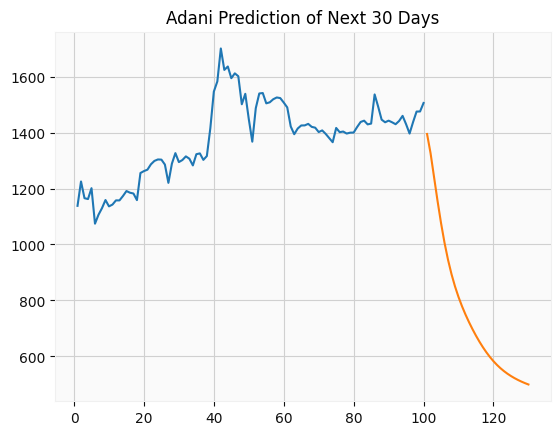

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[4656:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.title('Adani Prediction of Next 30 Days')

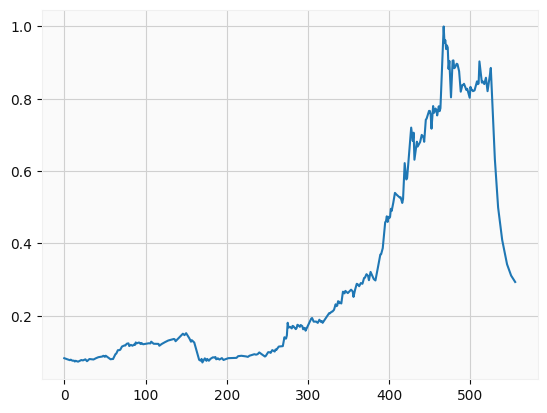

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[4230:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

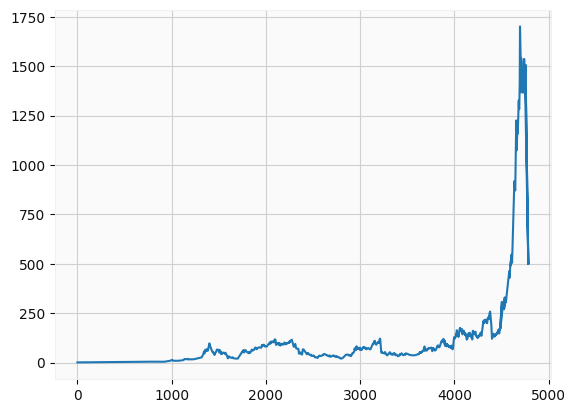

In [ ]:
plt.plot(df3)